# THIS FILE IS STILL WIP

In [1]:
# Load all the modules and auxiliary functions
from aux import *
from architecture import *
from engine import *

device(type='cuda')

# THIS FILE IS STILL WIP

## Optuna Optimization

In [2]:
Engine = Engine()

# Loading data
Engine._load_data()

[+] Loading Data..
[+] Data Loaded in 2 seconds!
Training data - Only background
[+] Loading Data..
[+] Data Loaded in 3 seconds!


In [3]:
# Define Study
study = optuna.create_study(study_name="Optimizing Discriminators 3", direction="maximize", storage="sqlite:///optuna_optim.db", load_if_exists=True)


# Optimization starts
Engine.optuna_optimization(study, timeout=100)

[I 2021-03-12 23:12:11,458] Using an existing study with name 'Optimizing Discriminators 3' instead of creating a new one.
[+] Starting training..

  3%|▎         | 1/33 [02:58<1:35:13, 178.55s/it]

Best Global Score found! ( 3.353081226348877 ) Saving..


"best"_fake: 1.0 | "best_real": 0.8299999833106995 | Current ROC Score: 0.7615407314232976 | Score: 3.353081226348877 | Step: 13871
  6%|▌         | 2/33 [08:18<2:08:43, 249.13s/it]


KeyboardInterrupt: 

## Optuna graphs

In [12]:
study = optuna.load_study(study_name="Optimizing Discriminators 2",storage="sqlite:///optuna_optim.db")
study.best_trial.value

3.554935932159424

In [13]:
optuna.visualization.plot_param_importances(study)

In [14]:
optuna.visualization.plot_intermediate_values(study)

In [15]:
optuna.visualization.plot_optimization_history(study)

In [16]:
optuna.visualization.plot_parallel_coordinate(study)

# Testing the model out

In [1]:
import joblib
import optuna, plotly
import torch
from os.path import join
from aux import *
from architecture import *
import pandas as pd 
import numpy as np 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score



In [2]:
study = optuna.load_study(study_name="Optimizing Discriminators 2",storage="sqlite:///optuna_optim.db")
trial = study.best_trial

In [3]:
print("  Value: ", trial.value)

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

  Value:  3.554935932159424
  Params: 
    NOISE_DIM: 270
    activation_disc: LeakyReLU
    activation_gen: ReLU
    disc_dropout_disc_l0: 0.6876584891243757
    disc_n_units_l0: 19
    early_stoping: 6
    gen_activation_last: LeakyReLU
    gen_dropout_l0: 0.5893463852398063
    gen_dropout_l1: 0.34073833758719385
    gen_dropout_l2: 0.2546205579689943
    gen_dropout_l3: 0.6171907644423773
    gen_dropout_l4: 0.1602953197253108
    gen_dropout_l5: 0.6432138641951932
    gen_dropout_l6: 0.6371427915584102
    gen_dropout_l7: 0.5871472117949058
    gen_n_units_l0: 32
    gen_n_units_l1: 76
    gen_n_units_l2: 27
    gen_n_units_l3: 31
    gen_n_units_l4: 117
    gen_n_units_l5: 104
    gen_n_units_l6: 42
    gen_n_units_l7: 12
    lr_disc: 7.169649739787664e-05
    lr_gen: 0.0006829915652251441
    n_epochs: 30
    n_layers_disc: 1
    n_layers_gen: 8
    optimizer_disc: AdamW
    optimizer_gen: Adam


In [4]:
# Set some things for evaluation
device = torch.device('cpu')
torch.set_grad_enabled(False)

# Define network architecture 
disc = define_Discriminator(trial).to(device)

# Load weights
disc.load_state_dict(torch.load(join(os.getcwd(),"disc.plk")))
disc.eval()

Sequential(
  (0): Linear(in_features=68, out_features=19, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Dropout(p=0.6876584891243757, inplace=False)
  (3): Linear(in_features=19, out_features=1, bias=True)
  (4): Sigmoid()
)

In [5]:
data = data_loader(data='test')
_, Features, Label, _, _  = next(create_batch(data, size=data.shape[0], device=device))
del data

[+] Loading Data..
[+] Data Loaded in 7 seconds!


In [6]:
# Pass data
predictions = disc(Features)

In [7]:
predictions = predictions.reshape(-1)

In [8]:
confusion_matrix(Label, predictions.round())

array([[1443021,     273],
       [  65614,     964]])

In [9]:
roc_auc_score(Label, predictions)#, sample_weight=val_weights)

0.8637918842340545

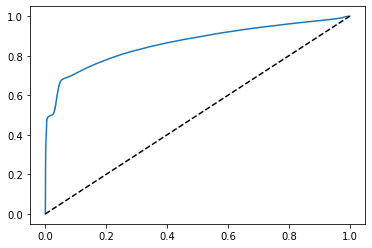

In [10]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# fpr = False positive rate
# tpr = True positive rate
fpr, tpr, thr = roc_curve(Label , predictions)#, sample_weight=test_data["Weights"])
plt.plot(fpr, tpr, label='ROC')
plt.plot([0,1],[0,1], 'k--')
plt.show()